In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Step 1: Counting complaints in Noise - Residential, Heat/Hot Water, and else by community board

In [0]:

count_noise = df[df.complaint_type == 'Noise - Residential'].groupby('community_board').size().reset_index(name='count_of_311_requests')
#.set_index('community_board')

count_heatwater = df[df.complaint_type == 'HEAT/HOT WATER'].groupby('community_board').size().reset_index(name='count_of_311_requests')
#.set_index('community_board')

count_other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')].groupby('community_board').size().reset_index(name='count_of_311_requests')
#.set_index('community_board')


In [0]:
#only works correctly if index has been set to community_board...but then can't call community_board in future functions....
count_check = df.groupby('community_board').size().reset_index(name='count_of_311_requests').set_index('community_board')
count_check['summed_count'] = count_other.count_of_311_requests.add(count_noise.count_of_311_requests, fill_value=0).add(count_heatwater.count_of_311_requests, fill_value=0)
count_check

,count_of_311_requests,summed_count
community_board,,
0 Unspecified,39385,NaN
01 BRONX,27353,NaN
01 BROOKLYN,68101,NaN
01 MANHATTAN,21259,NaN
01 QUEENS,60425,NaN
01 STATEN ISLAND,65145,NaN
02 BRONX,20039,NaN
02 BROOKLYN,44061,NaN
02 MANHATTAN,36688,NaN


##Full Noise / Heat Search

In [0]:
# cb_counts = df.groupby(['community_board', 'complaint_type']).size().reset_index(name='count_of_311_requests').set_index('community_board')
# cb_counts_noise = cb_counts[cb_counts.complaint_type.str.contains("Noise", case=False)].groupby('community_board').sum().reset_index(name='count_of_311_requests').set_index('community_board')

# search_terms = ['Heat','Hot Water']
# cb_counts_heat_hot = cb_counts[cb_counts.complaint_type.str.contains('|'.join(search_terms), case=False)].groupby('community_board').sum().reset_index(name='count_of_311_requests').set_index('community_board')

# cb_counts_else = cb_counts[~cb_counts.complaint_type.str.contains("Noise", case=False)]; cb_counts[~cb_counts.complaint_type.str.contains('|'.join(search_terms), case=False)]
# cb_counts_else = cb_counts_else.groupby('community_board').sum().reset_index(name='count_of_311_requests').set_index('community_board')

# cb_counts_check = cb_counts_else.count_of_311_requestsa.dd(cb_counts_heat_hot.count_of_311_requests, fill_value=0).add(cb_counts_noise.count_of_311_requests, fill_value=0)
# cb_counts_grouped = cb_counts.groupby('community_board').sum().reset_index(name='count_of_311_requests').set_index('community_board')
# cb_counts_check['original_count'] = cb_counts_grouped['count_of_311_requests']
# cb_counts_check

## Recoding Community Board Values in borocd

In [0]:
# this function will recode the community_board value into borocd in a new column
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[:2]
  else:
    return 'Invalid borocd'

count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)
count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)
count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)


population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')
def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

merged_noise = pd.merge(left=count_noise, right=population, left_on='borocd', right_on='borocd')
merged_heatwater = pd.merge(left=count_heatwater, right=population, left_on='borocd', right_on='borocd')
merged_other = pd.merge(left=count_other, right=population, left_on='borocd', right_on='borocd')

In [0]:
cd_noise = merged_noise[['borocd', 'Borough', 'CD Name', '2010 Population', 'count_of_311_requests']]
cd_heatwater = merged_heatwater[['borocd', 'Borough', 'CD Name', '2010 Population', 'count_of_311_requests']]
cd_other = merged_other[['borocd', 'Borough', 'CD Name', '2010 Population', 'count_of_311_requests']]


## Step 2: Make a Stacked Bar Chart

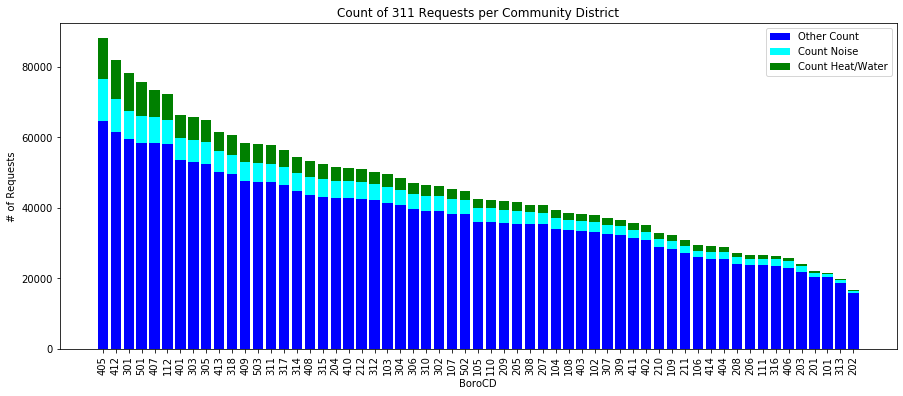

In [0]:
# list of bar positions on x axis
position_on_x = np.arange(len(cd_other))
# original set of data
counts_other = np.array(cd_other.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
# noise
counts_noise = np.array(cd_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
# heat
counts_heatwater = np.array(cd_heatwater.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)

figure(num=None, figsize=(15, 6))

plot1 = plt.bar(
  position_on_x,
  counts_other,
  align='center',
  color='blue',
  label='Other Count'
)
plot2 = plt.bar(
  position_on_x,
  counts_noise,
  bottom=counts_other, 
  align='center',
  color='cyan',
  label='Count Noise'
)
plot3 = plt.bar(
  position_on_x,
  counts_heatwater,
  bottom=counts_other+counts_noise, 
  align='center',
  color='green',
  label='Count Heat/Water'
)

plt.xticks(position_on_x, cd_other.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend()

##Step 3: Scatter plot of 311 counts per category vs. CD population

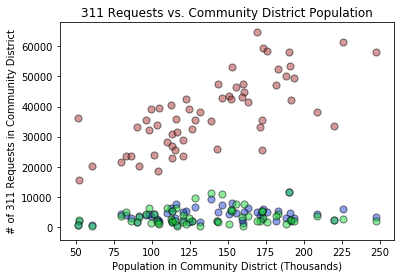

In [0]:
# define the data that will be used
x = cd_other['2010 Population']/1000
y1 = cd_other.count_of_311_requests
y2 = cd_noise.count_of_311_requests
y3 = cd_heatwater.count_of_311_requests

# define the styling of the scatter plot
area = 50 # area of the circle in pixels

plt.scatter(x, y1, s=area, c='#a83232', edgecolors='black', alpha=0.5) 
plt.scatter(x, y2, s=area, c='#1e43d6', edgecolors='black', alpha=0.5) 
plt.scatter(x, y3, s=area, c='#1ed63d', edgecolors='black', alpha=0.5) 

# s: size, c: color
# edgecolors: outline color of the marker
# alpha: transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('311 Requests vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')
plt.show()
